In [1]:
import numpy as np 
import pandas as pd 
## import spacy 

from pickle import dump, load 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU, Dropout
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('shakespeare_data.csv')
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [3]:
play_lines = data['PlayerLine']
play_lines.head()

0                                                ACT I
1                         SCENE I. London. The palace.
2    Enter KING HENRY, LORD JOHN OF LANCASTER, the ...
3               So shaken as we are, so wan with care,
4           Find we a time for frighted peace to pant,
Name: PlayerLine, dtype: object

In [4]:
play_lines.dropna(inplace=True)
play_lines.shape

(111396,)

In [5]:
play_lines = play_lines[play_lines.str.len() > 2]
play_lines.shape

(111389,)

In [6]:
text = ' '.join(play_lines[:10000]) # Use only the first 10,000 lines for training
print(text[:1000]) #print first 1000 characters of the text

ACT I SCENE I. London. The palace. Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others So shaken as we are, so wan with care, Find we a time for frighted peace to pant, And breathe short-winded accents of new broils To be commenced in strands afar remote. No more the thirsty entrance of this soil Shall daub her lips with her own children's blood, Nor more shall trenching war channel her fields, Nor bruise her flowerets with the armed hoofs Of hostile paces: those opposed eyes, Which, like the meteors of a troubled heaven, All of one nature, of one substance bred, Did lately meet in the intestine shock And furious close of civil butchery Shall now, in mutual well-beseeming ranks, March all one way and be no more opposed Against acquaintance, kindred and allies: The edge of war, like an ill-sheathed knife, No more shall cut his master. Therefore, friends, As far as to the sepulchre of Christ, Whose soldier now, under whose blessed cross We are

In [ ]:
## nlp = spacy.load('en_core_web_md', disable=['parser', 'ner', 'tagger'])
## nlp.max_length = 5000000 # set max length to avoid truncation

In [7]:
import re

def is_valid_line(line):
    line = line.strip().lower()
    
    # Remove empty lines
    if len(line) < 3:
        return False
    
    # Remove known stage directions
    if re.match(r'^(scene|act|enter|exeunt|exit|manet)', line):
        return False

    # Remove lines in brackets or all uppercase (common for directions)
    if line.startswith('[') or line.startswith('('):
        return False
    if line.upper() == line and len(line.split()) < 5:
        return False

    return True

In [8]:
clean_lines = [line for line in play_lines if is_valid_line(line)]
clean_lines[0:10] # Display first 10 cleaned lines

['So shaken as we are, so wan with care,',
 'Find we a time for frighted peace to pant,',
 'And breathe short-winded accents of new broils',
 'To be commenced in strands afar remote.',
 'No more the thirsty entrance of this soil',
 "Shall daub her lips with her own children's blood,",
 'Nor more shall trenching war channel her fields,',
 'Nor bruise her flowerets with the armed hoofs',
 'Of hostile paces: those opposed eyes,',
 'Which, like the meteors of a troubled heaven,']

In [9]:
text = ' '.join(clean_lines) # Use only the first 10,000 cleaned lines for training
print(text[:1000]) #print first 1000 characters of the cleaned text

So shaken as we are, so wan with care, Find we a time for frighted peace to pant, And breathe short-winded accents of new broils To be commenced in strands afar remote. No more the thirsty entrance of this soil Shall daub her lips with her own children's blood, Nor more shall trenching war channel her fields, Nor bruise her flowerets with the armed hoofs Of hostile paces: those opposed eyes, Which, like the meteors of a troubled heaven, All of one nature, of one substance bred, Did lately meet in the intestine shock And furious close of civil butchery Shall now, in mutual well-beseeming ranks, March all one way and be no more opposed Against acquaintance, kindred and allies: The edge of war, like an ill-sheathed knife, No more shall cut his master. Therefore, friends, As far as to the sepulchre of Christ, Whose soldier now, under whose blessed cross We are impressed and engaged to fight, Forthwith a power of English shall we levy, Whose arms were moulded in their mothers' womb To chase

In [20]:
import string

def clean_text(doc_text):
    return [
        word.strip(string.punctuation).lower()
        for word in doc_text.split()
        if word.strip(string.punctuation)
    ]

In [21]:
tokens = clean_text(text)
tokens

['so',
 'shaken',
 'as',
 'we',
 'are',
 'so',
 'wan',
 'with',
 'care',
 'find',
 'we',
 'a',
 'time',
 'for',
 'frighted',
 'peace',
 'to',
 'pant',
 'and',
 'breathe',
 'short-winded',
 'accents',
 'of',
 'new',
 'broils',
 'to',
 'be',
 'commenced',
 'in',
 'strands',
 'afar',
 'remote',
 'no',
 'more',
 'the',
 'thirsty',
 'entrance',
 'of',
 'this',
 'soil',
 'shall',
 'daub',
 'her',
 'lips',
 'with',
 'her',
 'own',
 "children's",
 'blood',
 'nor',
 'more',
 'shall',
 'trenching',
 'war',
 'channel',
 'her',
 'fields',
 'nor',
 'bruise',
 'her',
 'flowerets',
 'with',
 'the',
 'armed',
 'hoofs',
 'of',
 'hostile',
 'paces',
 'those',
 'opposed',
 'eyes',
 'which',
 'like',
 'the',
 'meteors',
 'of',
 'a',
 'troubled',
 'heaven',
 'all',
 'of',
 'one',
 'nature',
 'of',
 'one',
 'substance',
 'bred',
 'did',
 'lately',
 'meet',
 'in',
 'the',
 'intestine',
 'shock',
 'and',
 'furious',
 'close',
 'of',
 'civil',
 'butchery',
 'shall',
 'now',
 'in',
 'mutual',
 'well-beseeming',

In [22]:
# Check how many empty strings exist
empty_tokens = [t for t in tokens if t == '']
print(f"Number of empty tokens: {len(empty_tokens)}")

Number of empty tokens: 0


In [23]:
len(tokens) # Number of tokens in the text

791315

In [27]:
data = " ".join(tokens)
data[:1000] # Display first 1000 characters of the cleaned text

"so shaken as we are so wan with care find we a time for frighted peace to pant and breathe short-winded accents of new broils to be commenced in strands afar remote no more the thirsty entrance of this soil shall daub her lips with her own children's blood nor more shall trenching war channel her fields nor bruise her flowerets with the armed hoofs of hostile paces those opposed eyes which like the meteors of a troubled heaven all of one nature of one substance bred did lately meet in the intestine shock and furious close of civil butchery shall now in mutual well-beseeming ranks march all one way and be no more opposed against acquaintance kindred and allies the edge of war like an ill-sheathed knife no more shall cut his master therefore friends as far as to the sepulchre of christ whose soldier now under whose blessed cross we are impressed and engaged to fight forthwith a power of english shall we levy whose arms were moulded in their mothers womb to chase these pagans in those ho

In [148]:
train_len = 50 + 1  # 50 for input, 1 for label

text_sequences = []

for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

text_sequences = text_sequences[:200_000]  # Optional: limit for performance

print(f"Number of sequences: {len(text_sequences)}")

Number of sequences: 200000


In [149]:
tokenizer = Tokenizer() # Initialize the tokenizer with a vocabulary size of 3000
tokenizer.fit_on_texts(text_sequences) # Fit the tokenizer on the sequences
sequences = tokenizer.texts_to_sequences(text_sequences) # Convert sequences to integers
sequences[0] # First sequence converted to integers

[28,
 7021,
 26,
 31,
 39,
 28,
 7020,
 15,
 436,
 210,
 31,
 6,
 107,
 13,
 3316,
 192,
 4,
 13579,
 2,
 877,
 13578,
 7019,
 5,
 534,
 2532,
 4,
 18,
 7018,
 9,
 13577,
 1684,
 7017,
 32,
 51,
 1,
 7016,
 3315,
 5,
 22,
 2877,
 33,
 13576,
 41,
 715,
 15,
 41,
 132,
 3977,
 157,
 121,
 51]

In [150]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

tokenizer.index_word

28 : so
7021 : shaken
26 : as
31 : we
39 : are
28 : so
7020 : wan
15 : with
436 : care
210 : find
31 : we
6 : a
107 : time
13 : for
3316 : frighted
192 : peace
4 : to
13579 : pant
2 : and
877 : breathe
13578 : short-winded
7019 : accents
5 : of
534 : new
2532 : broils
4 : to
18 : be
7018 : commenced
9 : in
13577 : strands
1684 : afar
7017 : remote
32 : no
51 : more
1 : the
7016 : thirsty
3315 : entrance
5 : of
22 : this
2877 : soil
33 : shall
13576 : daub
41 : her
715 : lips
15 : with
41 : her
132 : own
3977 : children's
157 : blood
121 : nor
51 : more


{1: 'the',
 2: 'and',
 3: 'i',
 4: 'to',
 5: 'of',
 6: 'a',
 7: 'you',
 8: 'my',
 9: 'in',
 10: 'that',
 11: 'is',
 12: 'not',
 13: 'for',
 14: 'me',
 15: 'with',
 16: 'his',
 17: 'he',
 18: 'be',
 19: 'it',
 20: 'but',
 21: 'your',
 22: 'this',
 23: 'have',
 24: 'thou',
 25: 'him',
 26: 'as',
 27: 'will',
 28: 'so',
 29: 'thy',
 30: 'what',
 31: 'we',
 32: 'no',
 33: 'shall',
 34: 'by',
 35: 'if',
 36: 'all',
 37: 'thee',
 38: 'our',
 39: 'are',
 40: 'do',
 41: 'her',
 42: 'now',
 43: 'on',
 44: 'from',
 45: 'at',
 46: 'they',
 47: 'lord',
 48: 'was',
 49: 'good',
 50: 'or',
 51: 'more',
 52: 'come',
 53: 'them',
 54: 'well',
 55: 'would',
 56: 'then',
 57: 'their',
 58: 'am',
 59: 'sir',
 60: 'which',
 61: 'o',
 62: 'when',
 63: 'here',
 64: 'how',
 65: 'let',
 66: 'than',
 67: 'us',
 68: "i'll",
 69: 'king',
 70: 'hath',
 71: 'did',
 72: 'like',
 73: 'were',
 74: 'man',
 75: 'upon',
 76: 'make',
 77: 'an',
 78: 'say',
 79: 'she',
 80: 'go',
 81: 'had',
 82: 'yet',
 83: 'should',
 84

In [151]:
tokenizer.word_counts

OrderedDict([('so', 58555),
             ('shaken', 53),
             ('as', 68401),
             ('we', 48754),
             ('are', 40546),
             ('wan', 58),
             ('with', 93537),
             ('care', 2610),
             ('find', 6052),
             ('a', 165666),
             ('time', 12814),
             ('for', 96262),
             ('frighted', 219),
             ('peace', 6544),
             ('to', 230920),
             ('pant', 18),
             ('and', 319228),
             ('breathe', 1193),
             ('short-winded', 21),
             ('accents', 73),
             ('of', 205897),
             ('new', 2115),
             ('broils', 331),
             ('be', 88107),
             ('commenced', 79),
             ('in', 134188),
             ('strands', 30),
             ('afar', 541),
             ('remote', 83),
             ('no', 47208),
             ('more', 29155),
             ('the', 347872),
             ('thirsty', 87),
             ('entrance', 241),

In [152]:
def token_coverage(tokenizer, top_n):
    word_counts = tokenizer.word_counts
    sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

    total_token_count = sum(word_counts.values())
    top_token_count = sum(count for word, count in sorted_word_counts[:top_n])

    coverage = (top_token_count / total_token_count) * 100
    print(f"Top {top_n} words cover {coverage:.2f}% of all word occurrences.")
    return coverage


In [153]:
# Assuming tokenizer is already fitted
coverage = token_coverage(tokenizer, top_n=3000)

Top 3000 words cover 91.04% of all word occurrences.


In [154]:
# Assuming tokenizer is already fitted
coverage = token_coverage(tokenizer, top_n=2000)

Top 2000 words cover 87.69% of all word occurrences.


In [155]:
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index
vocab_size

13581

In [156]:
sequences = np.array(sequences) # Convert sequences to numpy array
sequences[:5] # First 5 sequences

array([[   28,  7021,    26,    31,    39,    28,  7020,    15,   436,
          210,    31,     6,   107,    13,  3316,   192,     4, 13579,
            2,   877, 13578,  7019,     5,   534,  2532,     4,    18,
         7018,     9, 13577,  1684,  7017,    32,    51,     1,  7016,
         3315,     5,    22,  2877,    33, 13576,    41,   715,    15,
           41,   132,  3977,   157,   121,    51],
       [ 7021,    26,    31,    39,    28,  7020,    15,   436,   210,
           31,     6,   107,    13,  3316,   192,     4, 13579,     2,
          877, 13578,  7019,     5,   534,  2532,     4,    18,  7018,
            9, 13577,  1684,  7017,    32,    51,     1,  7016,  3315,
            5,    22,  2877,    33, 13576,    41,   715,    15,    41,
          132,  3977,   157,   121,    51,    33],
       [   26,    31,    39,    28,  7020,    15,   436,   210,    31,
            6,   107,    13,  3316,   192,     4, 13579,     2,   877,
        13578,  7019,     5,   534,  2532,    

In [157]:
X = sequences[:, :-1] # Features (all but last token in each sequence)
y = sequences[:, -1] # Labels (last token in each sequence)
print(X[:5]) # First 5 sequences of features
print('\n')
print(y[:5]) # First 5 labels

[[   28  7021    26    31    39    28  7020    15   436   210    31     6
    107    13  3316   192     4 13579     2   877 13578  7019     5   534
   2532     4    18  7018     9 13577  1684  7017    32    51     1  7016
   3315     5    22  2877    33 13576    41   715    15    41   132  3977
    157   121]
 [ 7021    26    31    39    28  7020    15   436   210    31     6   107
     13  3316   192     4 13579     2   877 13578  7019     5   534  2532
      4    18  7018     9 13577  1684  7017    32    51     1  7016  3315
      5    22  2877    33 13576    41   715    15    41   132  3977   157
    121    51]
 [   26    31    39    28  7020    15   436   210    31     6   107    13
   3316   192     4 13579     2   877 13578  7019     5   534  2532     4
     18  7018     9 13577  1684  7017    32    51     1  7016  3315     5
     22  2877    33 13576    41   715    15    41   132  3977   157   121
     51    33]
 [   31    39    28  7020    15   436   210    31     6   107    13

In [158]:
# y = to_categorical(y, num_classes=vocab_size) 
print(y.shape)

(200000,)


In [159]:
sequence_len = X.shape[1] # Length of each sequence
print(sequence_len)

50


In [170]:
from keras.optimizers import Adam

def create_model_LSTM(vocab_size, seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=seq_len))

    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.001) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()
    return model

In [174]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2)
checkpoint = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

In [175]:
lstm_model = create_model_LSTM(vocab_size, seq_len=sequence_len) # Create LSTM model
history = lstm_model.fit(X, y, epochs=40, batch_size=128, validation_split=0.2, callbacks=[early_stop, reduce_lr, checkpoint], verbose=1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 50, 100)           1358100   
                                                                 
 lstm_28 (LSTM)              (None, 50, 64)            42240     
                                                                 
 dropout_28 (Dropout)        (None, 50, 64)            0         
                                                                 
 lstm_29 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 13581)           

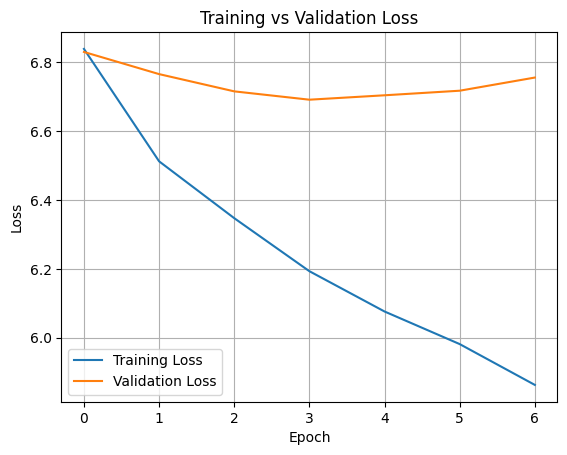

In [176]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [179]:
def create_model_GRU(vocab_size, seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=seq_len))

    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(GRU(64))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()
    return model

In [180]:
checkpoint = ModelCheckpoint('best_model_gru.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

gru_model = create_model_GRU(vocab_size, seq_len=sequence_len) # Create GRU model
history_gru = gru_model.fit(X, y, epochs=40, batch_size=128, validation_split=0.2, callbacks=[early_stop, reduce_lr, checkpoint], verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 100)           1358100   
                                                                 
 gru_2 (GRU)                 (None, 50, 64)            31872     
                                                                 
 dropout_32 (Dropout)        (None, 50, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 13581)           

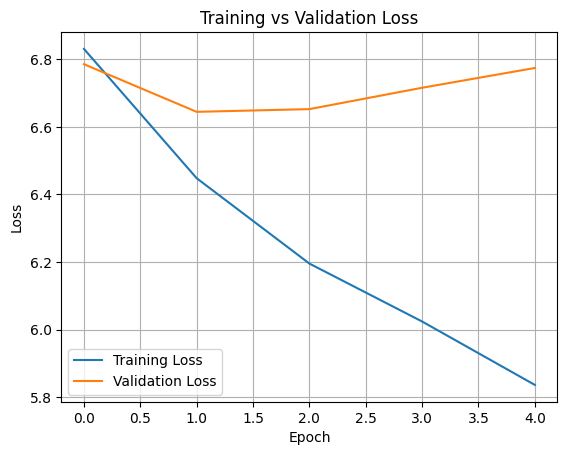

In [181]:
import matplotlib.pyplot as plt

plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [182]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)